In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/MLTempDataset.csv"  # Path from the uploaded file
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0895
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0162
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0125
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0103
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0108
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0106
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0093
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0101
Epoch 9/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0095
Epoch 10/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0101
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


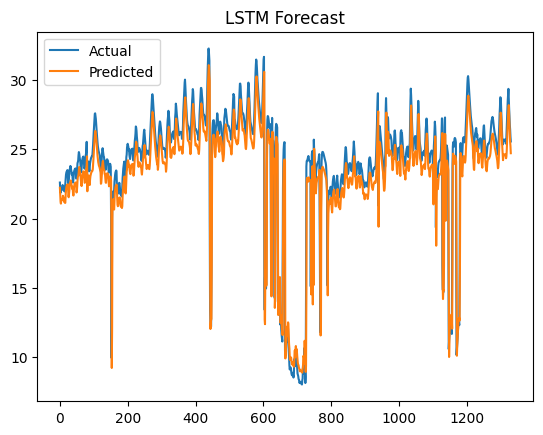

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare data
data = df['DAYTON_MW'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, step=24):
    X, y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict and plot
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title("LSTM Forecast")
plt.legend()
plt.show()
